#  **Measuring Effect of Product Recommendation Initiative to decide whether to  launch feature to all user**

![Website](isaac-smith-unsplash.jpg)
<center>Photo by <a href="https://unsplash.com/@isaacmsmith?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Isaac Smith</a> on <a href="https://unsplash.com/photos/pen-om-paper-AT77Q0Njnt0?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  </center>

PT Buah Alam , is an online grocery store that are currently growing at an grow stages of startup, to reach profitability they need to make a move. One of the eandeavor by approaching by boosting sales on platform. 

How to do that ? There are lot of ways. One of them through upselling / cross selling 

The Data Science Team already developed the recommendation algorithm in checkout pages 

![variant](variant.PNG)

Here's a catch : 

1. If we implement new initiative to all of our user , the cost is too big and does not guarantee better marketing performance



2. If we implement don't implement / atleast try, we have opportunity cost , "maybe" this initiative works well and yield better marketing performance 

Solution ? 

There are several ways to prove causality / causal relationship 

![Website](hierarchy.PNG)



One of the most reliable tool is through Randomized Control Trial (RCT) 

For example, we want to estimate the effect on changing call to action in payment button

![Website](effect.PNG)

However there are still other potential cause or what we called as **confounding** variable. 


![confounding factor](confounding.PNG)

To remove the bias , we could add randomization to make other confounder equal , by assignming randomly which user get button change

![Randomization](randomization.PNG)

That the basic idea of **Randomized Control Trial** or commonly called as A/B Test

So when does the A/B Test works ? 

1. When each experiment unit doesnot interfere / influence other experiment unit (Stable Unit Treatment Value Assumption)
   For example in marketplace where there is network effect

2. When assigning experiment is possible (for example it's unethical to assign people to get lower education)
   
3. When period is too long For example experimenting on ads campaign to measure number of deals made for property housing 


So is it possible in our case ? Yes ! It's possible because : 

1. Each user can be assigned to different feature 

2. Each user doesnot interfere with other users

3. The period to measure causal impact still feasible 

So how do we do A/B test? Don't worry here is the steps : 

![ab test workflow](workflow.PNG)

# 1. Setting Up Problem 

Our focus is about increasing revenue ? But which revenue ? There are lot of revenues. The Revenue we are using is from user transaction because we can intervene on it. 

After that we should have idea what is the current funnel / user journey in buying phase 

![journey](journey.png)


After that we should decide what metrics as our target of experimentation. Back to our goal this recommender system initiative to boost revenue. Spesifically Revenue from User Transaction. Hence our **metrics** is **Revenue per User**

# 2. Designing Experiment 

## 2.1. Experiment Unit 
Our Experiment unit is user level , but which user since the recommendation system is located checkout process , our user pool is user who proceed into checkout process 

## 2.2. Group 
- Control Group : Users who dont receive product recommendation during checkout process 
- Treatment Group : User who receive product recommendation during checkout process 



## 2.3. Hypothesis 
We want to check if revenue per user for treatment group is > control group 

$H_0 = \mu_{control} >= \mu_{treatment}$

$H_1 = \mu_{control} < \mu_{treatment}$


Our statistical test aim to prove the hypothesis whether it is rejected or fail to reject 






## 2.3. Number of Samples 
As Information , we have **15 Million** Active User , with median monthly in-checkout-process user of **20.000** . We use median because number of user in checkout process is vary. 

So how many number of user we need for both treatment and control ? Well it's depend on Treatment Effect you want to capture , the smaller the effect you want to capture the more sample we need to add because of the experiment precision


Decision to role out new feature based on whether new initiative meet certain criteria such as :

1. Statistically Significant 
   We'll talk about it later

2. Practically Significant
   Related to Business Requirement


### 2.3.1 Business Requirement 

Our new initiative by recommending purchase is indeed costly, we have to calculate the cost first 

#### 2.3.1.1. Cost of Making Recommendation 


1. Man Power 
   The Development process assumed in six month , people that are involved : 

      - Data Scientist , assume monthly rate \$ 8000 to \$ 12000 / month x 6 month = \$ 48.000 - \$ 72.000 
  
      - Data Engineer  , assume monthly rate $8000 to $12000 / month x 6 month = $48.000 - $72.000 

      - MLOps , assume monthly rate $9000 to $10000 / month x 6 month = $45.000 - $60.000 
  
      - Software Engineer , assume monthly rate $9000 to $10000 / month x 6 month = $45.000 - $60.000 





        |                   | Development Cost      | Development Cost     |
        |-------------------|-----------------------|----------------------|
        | **Role**              | Lower Bound Cost   | Upper Bound Cost |
        | Data Scientist    | 48000                 | 72000                |
        | Data Engineer     | 48000                 | 72000                |
        | MLOps             | 45000                 | 60000                |
        | Software Engineer | 45000                 | 60000                |
        | **Total Cost** | 186000                 | 264000                |
   		
 
2.  Cloud 
    to handle ~ 100k users per  day x 30 day, another information is that the calculation is in batch manner, we don't need real time recommendation yet. Let say the cost isUSD $1000-2000 per month  x 12 month =$1.000 -$24.000  annualy


3. Cost Summarization

   
| Cost Attribute    | Lower Bound Cost  | Upper Bound Cost |
|-------------------|-------------------|------------------|
| Development Cost  | 186000            | 264000           |
| Annual Infra Cost | 12000             | 24000            |
| Total             | 198000            | 288000           |  | 




#### 2.3.1.2. Reasonable Revenue 

We have seen that in order to make recommender system is not cheap at this scale, hence at what incremental level should we roll out this feature to all user ? Of Course covering costs + expected increase in user revenue. 

About cost we have already know let say we take  USD 288,000 , what about expected increase in user revenue. As per now median per user revenue was about USD 1 daily.  Median  of monthly user checkout 100.000 user 
minimum revenue should be $Revenue >= 288.000$ 

Current Revenue per User/ annual  = 1 x 20.000 x 12  =  USD 240.000 
Gaps = Not Yet Covered Cost + Expected Growth USD 48.000 / (12 x 20.000 ) = USD 0.2 

Revenue / User / Daily >= USD 1.2 

If we continue to success we can have USD 1 increase from USD 1 to USD 2 We can have Additional Revenue of 

**First Year**

2-1.2 x 20.000 x 12 = **USD 192.000**

**Second Year or more**

2 x 20.000 x 12 - (Annual Infra Cost) 

2 x 20.000 x 12 - (24.000) = **USD 456.000**

So in this case we have to able to detect USD 1 Change in revenue per user. This will relate to the next problem which is power Analysis





### 2.3.1 Power Analysis 

In statistical testing there are two possible Errors : 

- Rejecting when it should failed to be Rejected, or (Type I Error) 
- Fail to Reject when it should be Rejected or (Type II Error)


Typically Type I Error influence what we called as significance level or $\alpha$. While the second one is influenced by Power $(1-\beta)$


Will be focusing on **Power** Analysis 

- Power is the probability to reject $H_{0}$ given $H_{0}$ is false.

$$
\text{power} = 1-\beta = P(\text{reject } H_{0} \ | \ H_{0} \text{ is false})
$$

- Power is dependent to Factor such as 
  - Effect size
  - Data variance
  - Sample size ($n$)

We will simulate how above mentioned factor related to power 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math 
import scipy.stats as stats

In [2]:
def generate_data(mu_1,mu_2,std_dev_1,std_dev_2,n_sample_1,n_sample_2, N=10000, n_repeat=1000):

    # generate data 
    data_1 = np.random.normal(mu_1, std_dev_1, N)
    data_2 = np.random.normal(mu_2, std_dev_2, N)

    sample_1_mean = []
    sample_2_mean = []

    for i in range(n_repeat):
        # Generate data
        sample_1 = np.random.choice(data_1, size=(1, n_sample_1), replace=False)
        sample_2 = np.random.choice(data_2, size=(1, n_sample_2), replace=False)

        # obtain mean 
        mean_1 = sample_1.mean()
        mean_2 = sample_2.mean()

        # Append mean to the list
        sample_1_mean.append(mean_1)
        sample_2_mean.append(mean_2)


    return sample_1_mean,sample_2_mean


In [3]:
def generate_ab_viz(mean_1,mean_2) : 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

    sns.histplot(mean_1,alpha = 1, bins = 30,kde=True,
                label = r"Group 1 - $H_0$",color='red')
    sns.histplot(mean_2,alpha = 1, bins = 30,kde=True,
                label = r"Group 2 - $H_1$",color='green')
    plt.axvline(np.mean(mean_1),color = 'b',label='group 1 mean',linestyle='--')
    plt.axvline(np.mean(mean_2),color = 'yellow',label='group 2 mean',linestyle='--')
    ax.legend()
    plt.show()

Let's generate some simulation 

#### **Variance**

**Bigger**

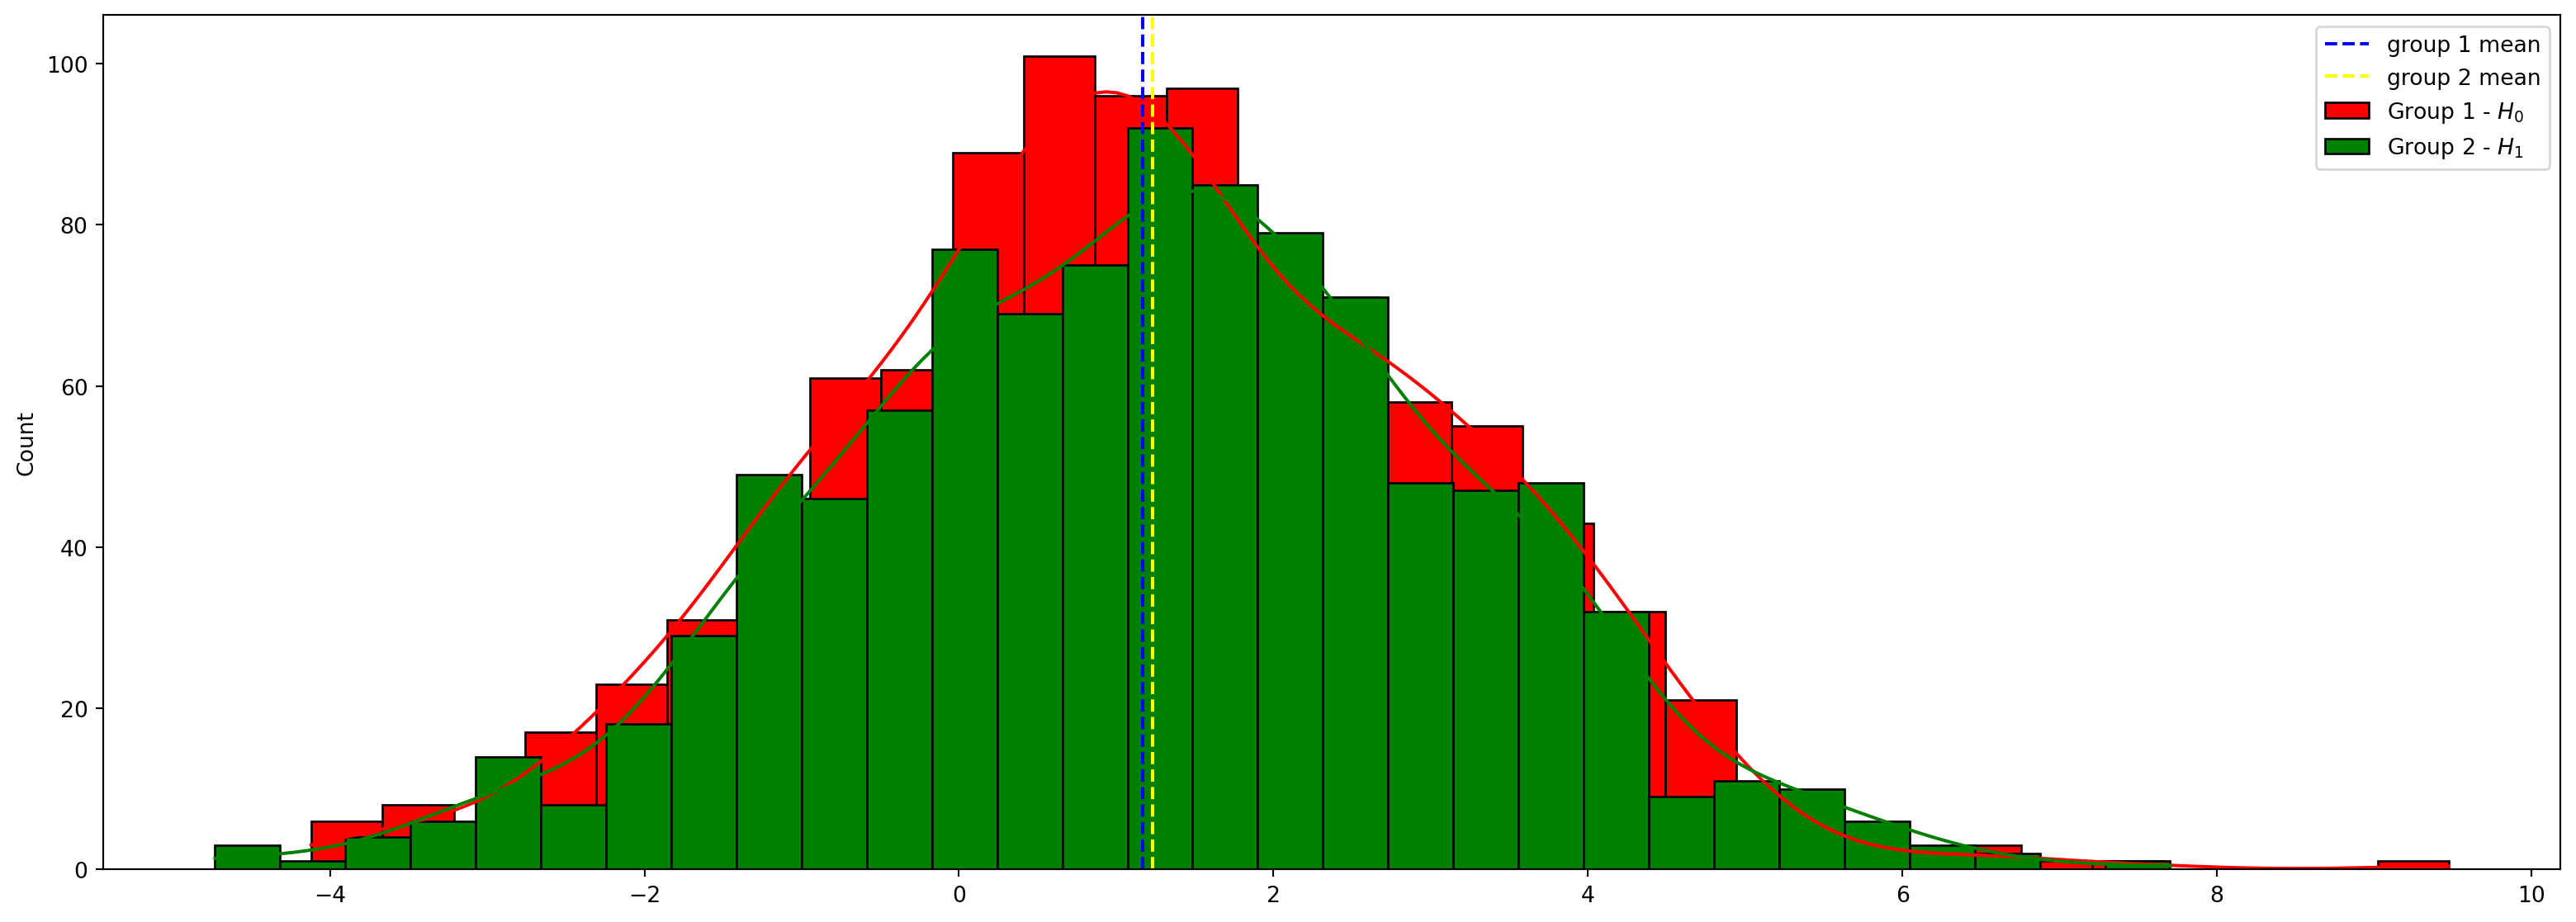

In [4]:
dict_params = {
    'mu_1' : 1 ,'mu_2' : 2 ,
    'std_dev_1':20 , 'std_dev_2':20, 
    'n_sample_1':100,'n_sample_2':100,
    'n_repeat':1000
}
mean_1,mean_2 = generate_data(**dict_params, N=1000)
generate_ab_viz(mean_1,mean_2)

The More Variance we get, is getting harder to see the effect size of two groups

**Smaller**

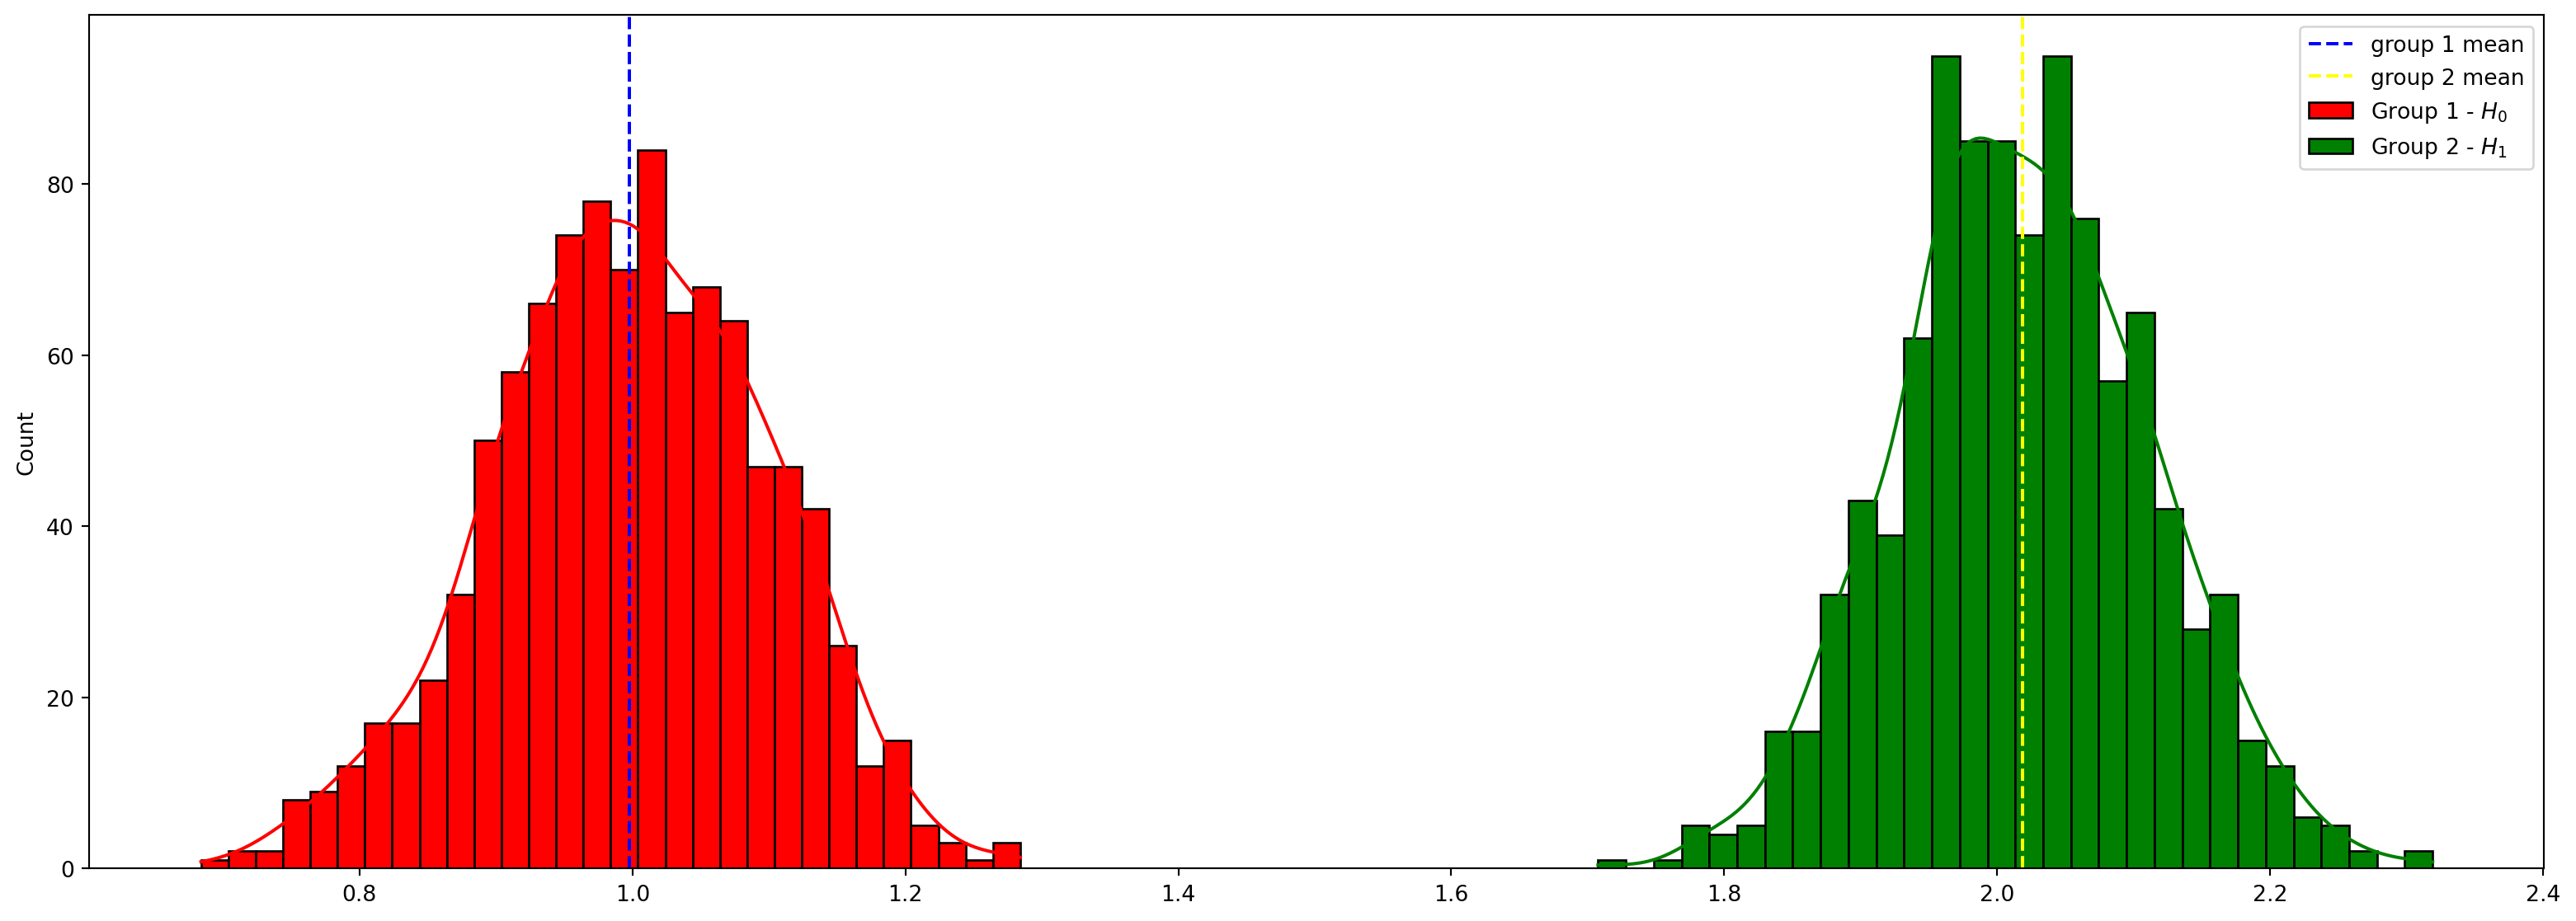

In [5]:
dict_params = {
    'mu_1' : 1 ,'mu_2' : 2 ,
    'std_dev_1':1 , 'std_dev_2':1, 
    'n_sample_1':100,'n_sample_2':100,
    'n_repeat':1000
}
mean_1,mean_2 = generate_data(**dict_params, N=1000)
generate_ab_viz(mean_1,mean_2)

The Less Variance we get we can see the difference clearly now 

#### **Sample Size**

**Smaller**

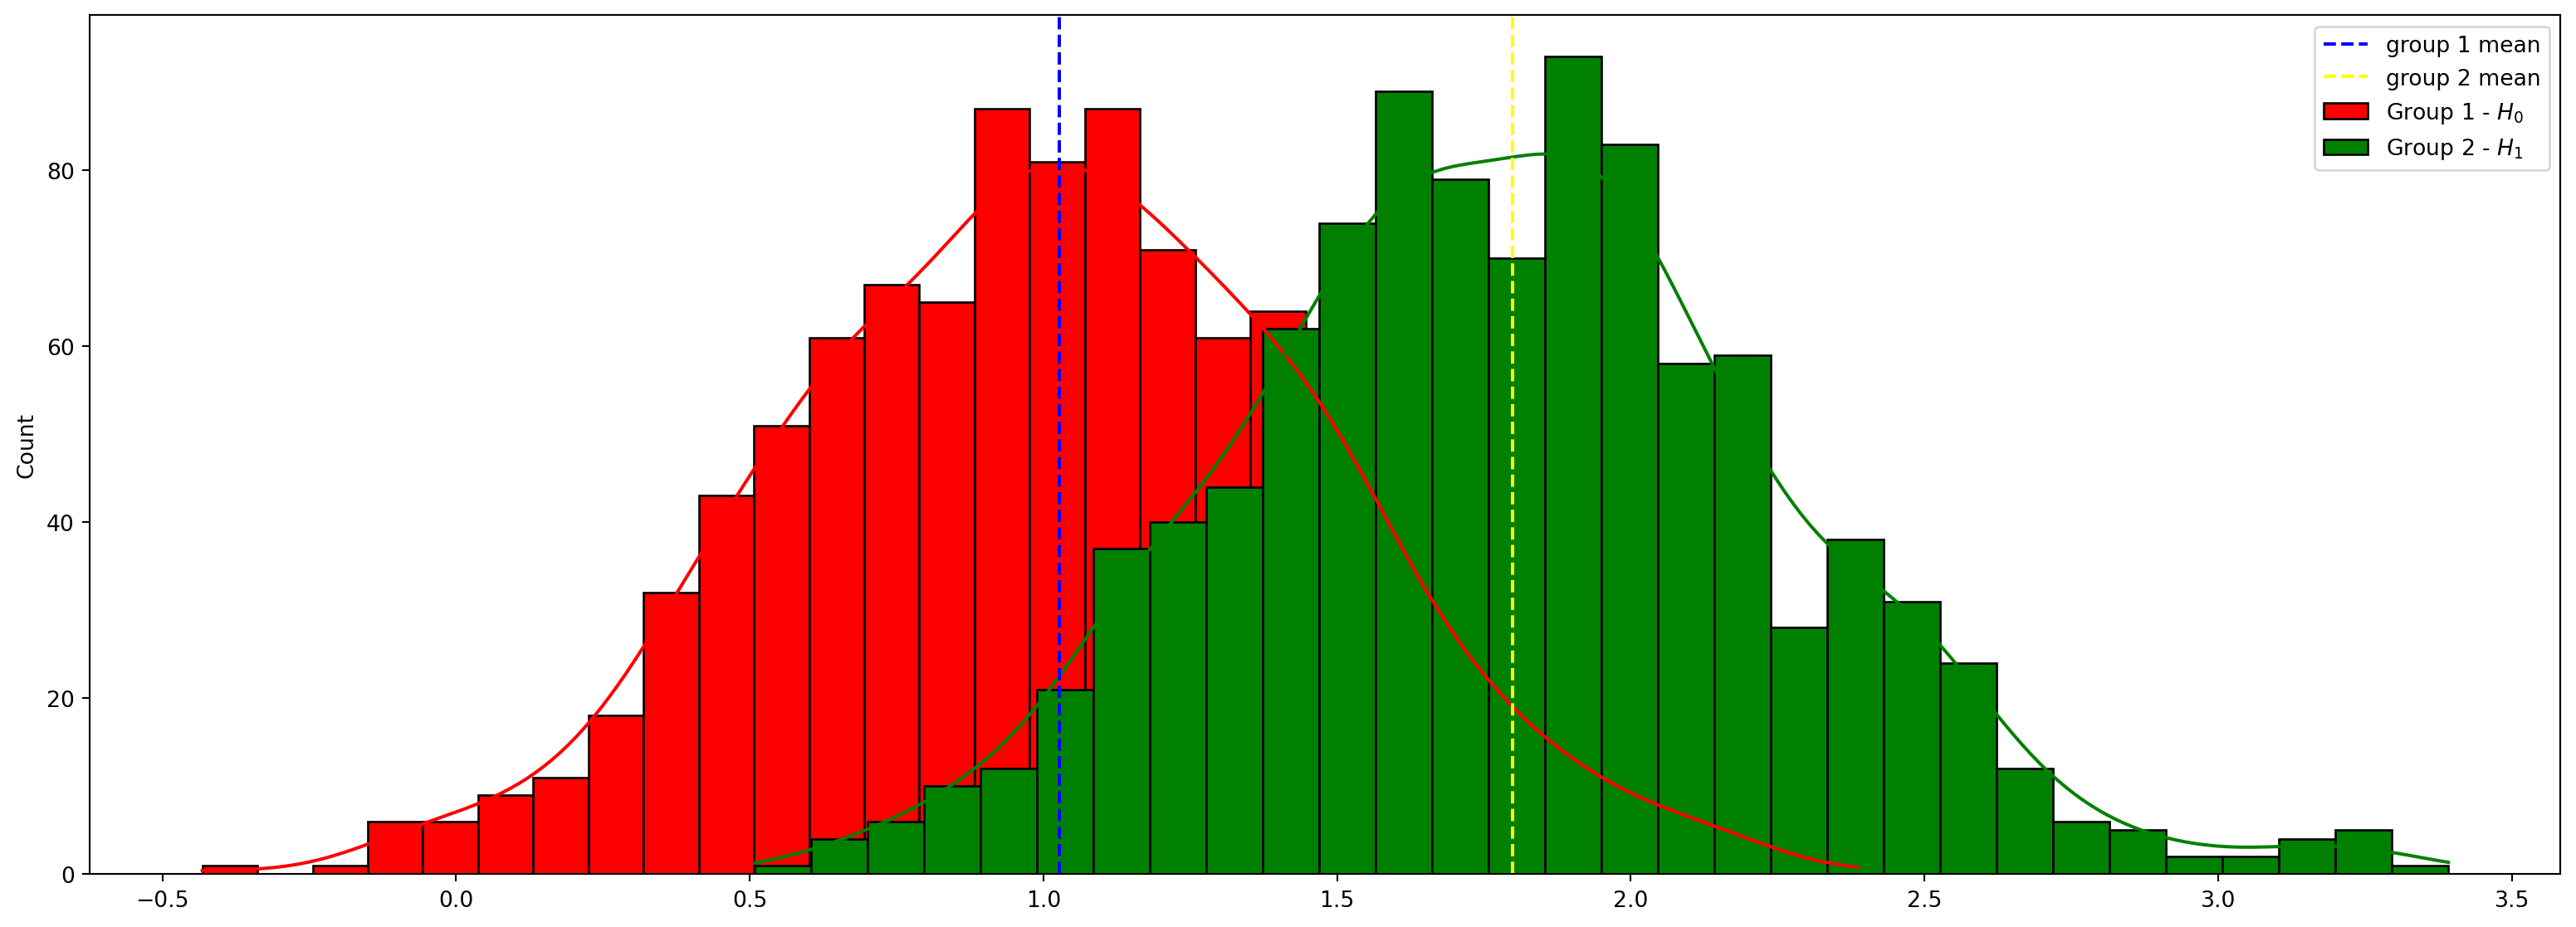

In [6]:
dict_params = {
    'mu_1' : 1 ,'mu_2' : 2 ,
    'std_dev_1':5 , 'std_dev_2':5, 
    'n_sample_1':100,'n_sample_2':100,
    'n_repeat':1000
}
mean_1,mean_2 = generate_data(**dict_params, N=1000)
generate_ab_viz(mean_1,mean_2)

**Bigger**

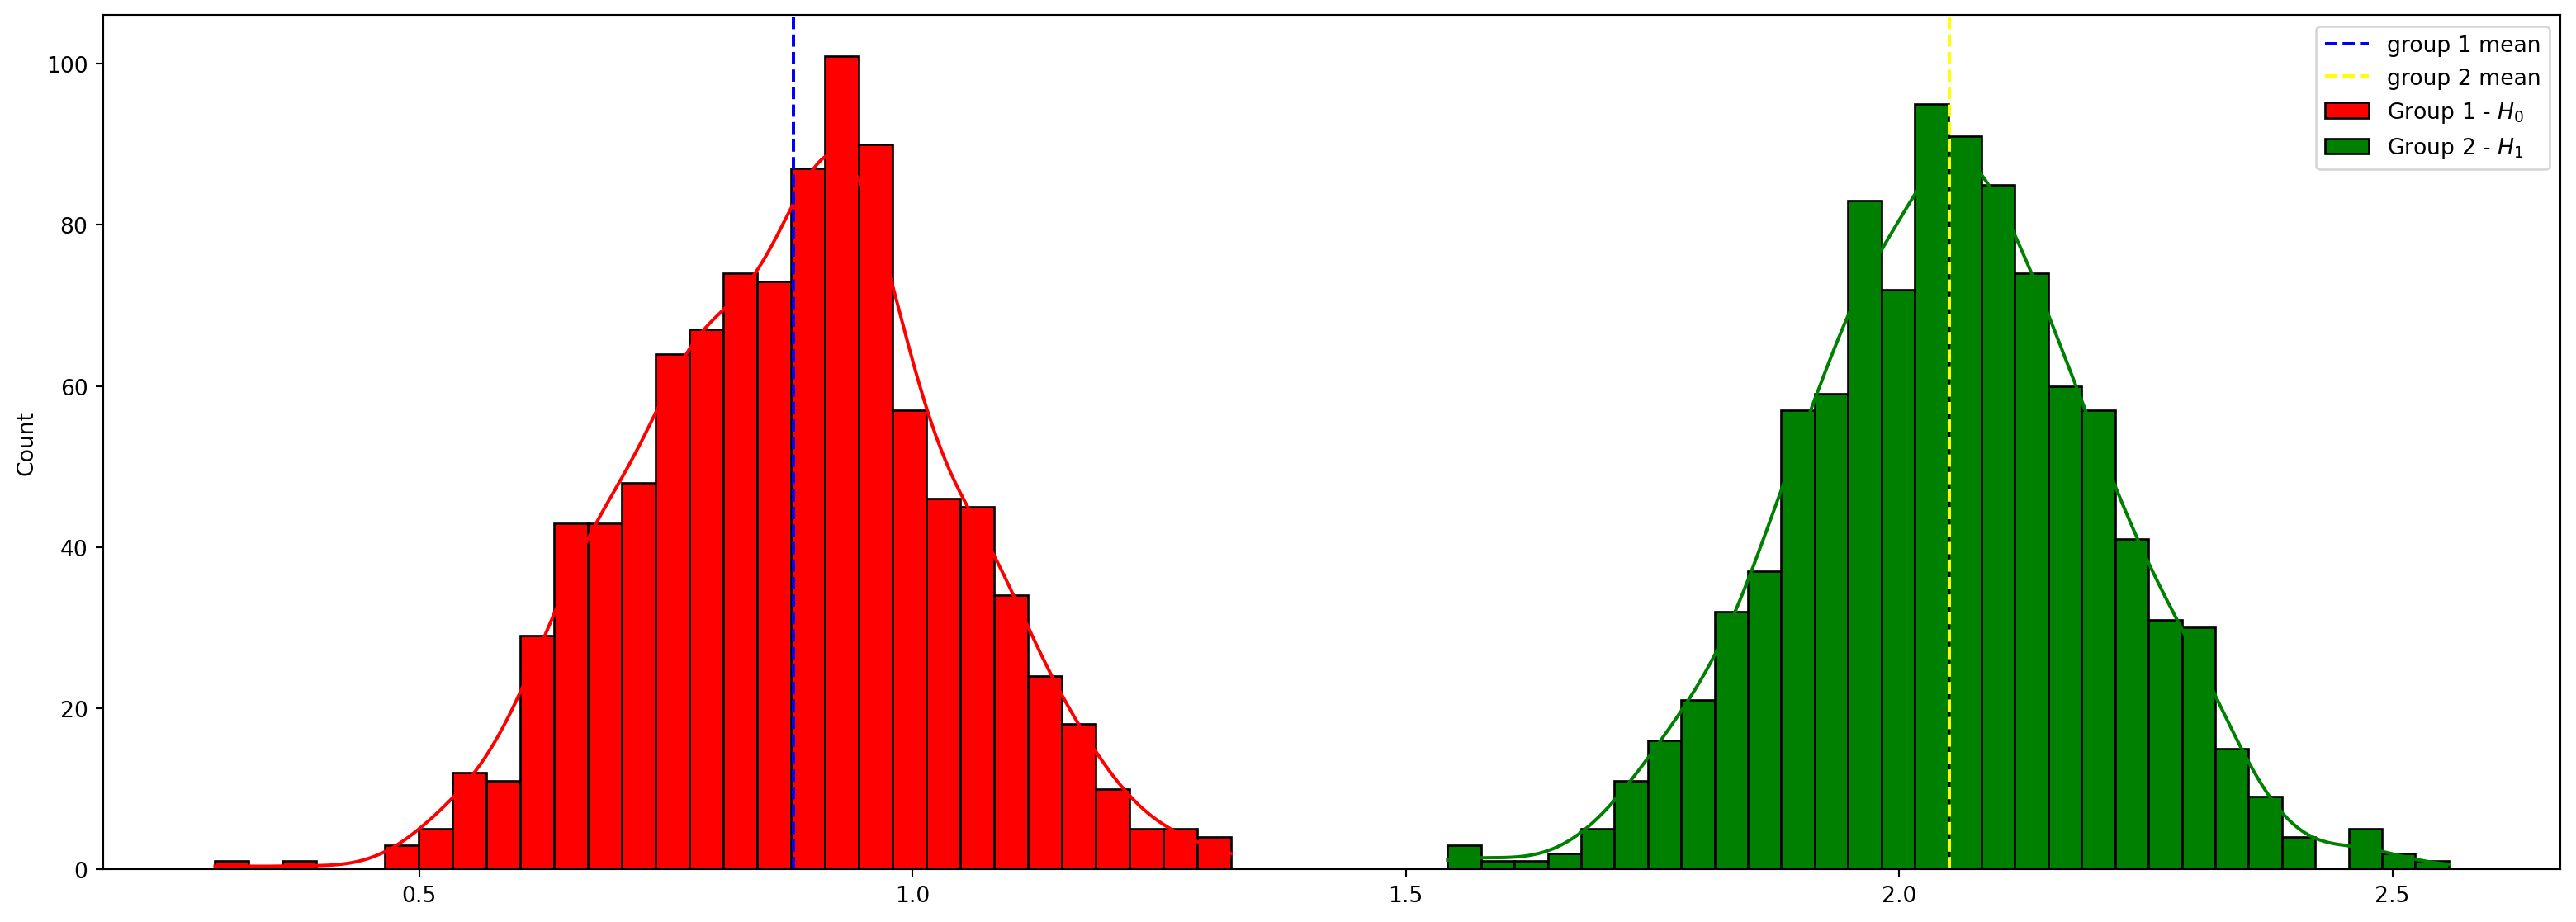

In [7]:
dict_params = {
    'mu_1' : 1 ,'mu_2' : 2 ,
    'std_dev_1':5 , 'std_dev_2':5, 
    'n_sample_1':500,'n_sample_2':500,
    'n_repeat':1000
}
mean_1,mean_2 = generate_data(**dict_params, N=1000)
generate_ab_viz(mean_1,mean_2)

#### **Effect Size** 

or Change / Increase we want to detect

**Smaller**

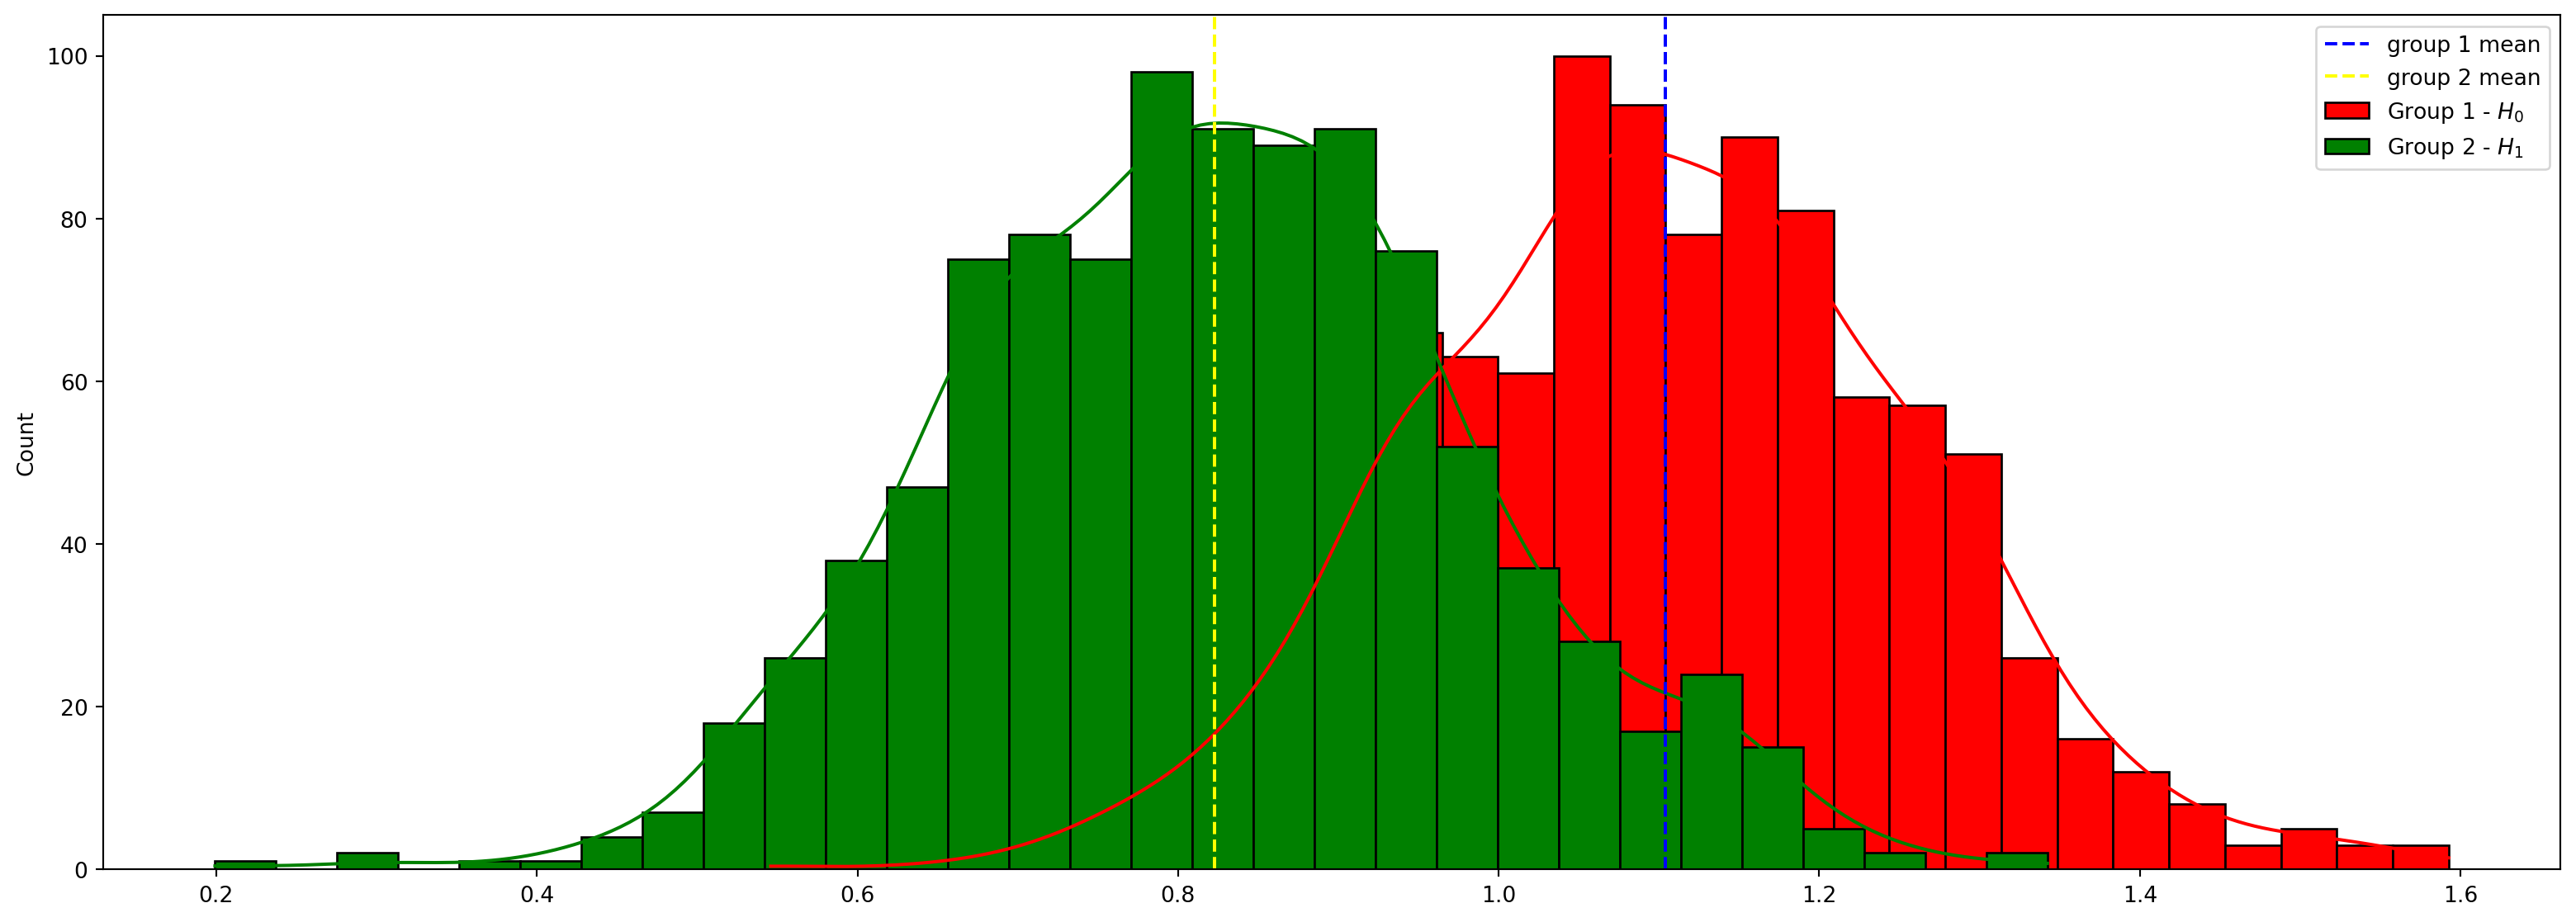

In [8]:
dict_params = {
    'mu_1' : 1 ,'mu_2' : 1+0.01 ,
    'std_dev_1':5 , 'std_dev_2':5, 
    'n_sample_1':500,'n_sample_2':500,
    'n_repeat':1000
}
mean_1,mean_2 = generate_data(**dict_params, N=1000)
generate_ab_viz(mean_1,mean_2)

**Bigger**

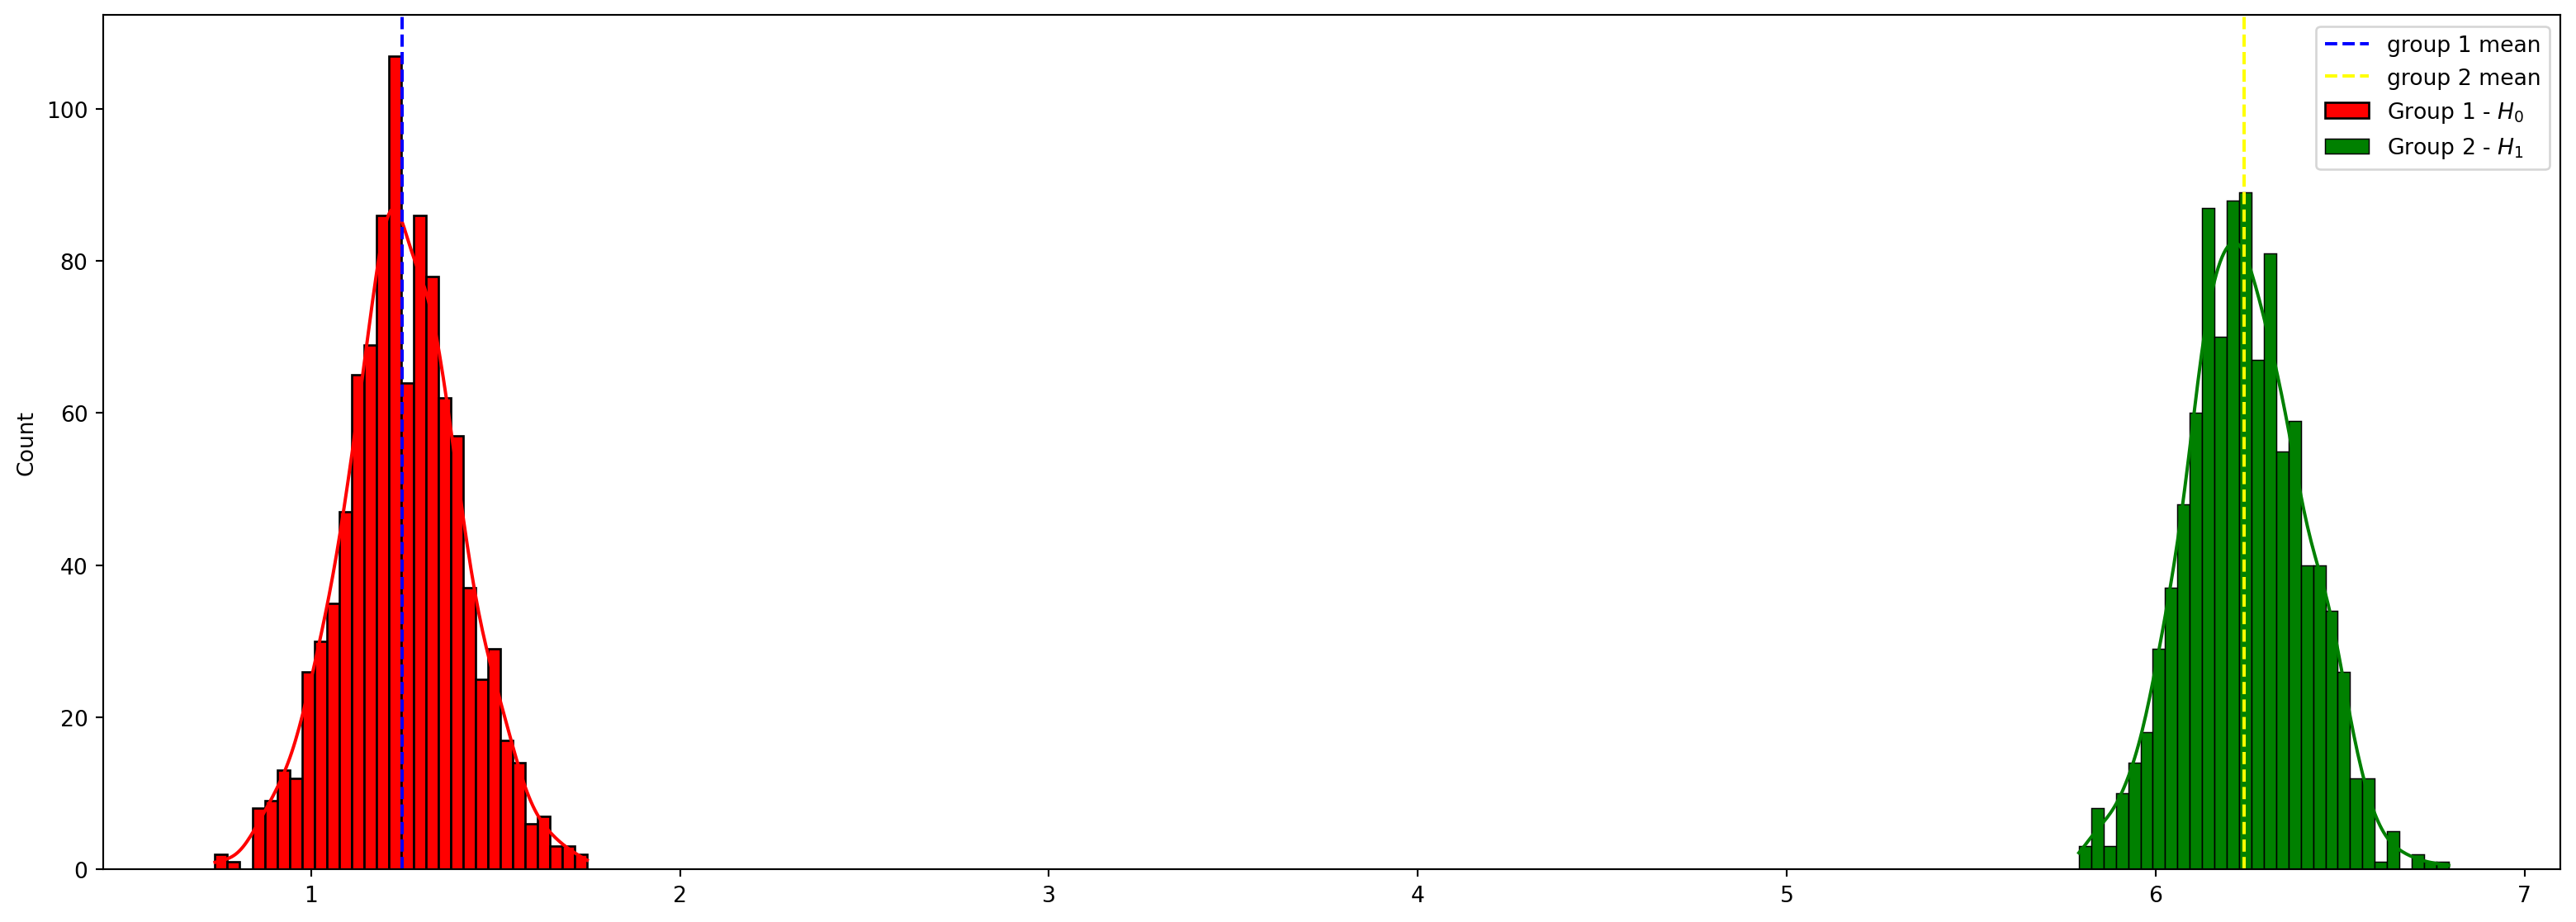

In [9]:
dict_params = {
    'mu_1' : 1 ,'mu_2' : 1+5 ,
    'std_dev_1':5 , 'std_dev_2':5, 
    'n_sample_1':500,'n_sample_2':500,
    'n_repeat':1000
}
mean_1,mean_2 = generate_data(**dict_params, N=1000)
generate_ab_viz(mean_1,mean_2)

The more small effect size we want to detect --> **more power required**

### Wrapping Up 


In this case we have already know how much effect we wanna test , in this case USD 1 Increase in Revenue oer User 

to calculate minimum sample size we can use : 
$$
n = \cfrac{2 \sigma^2 (z_{1-\alpha/2}+z_{1-\beta})^2}{\delta^2}
$$

with : 

1. $\delta$ : Effect Size
2. $\sigma$ : variance of Population (estimated) from revenue per user variance 
3. $\alpha/2$ : alpha ,  $1- Confidence Interval$
4. $\beta$ : beta, 1- Power Level
5. $z$ : z score

Deciding $\alpha$ and $\beta$ , in a typical experiment 

1. $\alpha$ is 5% or Confidence is 95%
2. $\beta$ is 20%  or Power is 80%

In [10]:
def calculate_minimum_sample(effect_size,std,alpha,beta) : 
    # obtain both zscore
    z_alpha_2 = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(1 - beta)
    
    upper = 2*(std**2)*(z_alpha_2 + z_beta)**2
    lower = effect_size**2
    
    n_sample = math.ceil(upper/lower)
    return n_sample

In [11]:
n_sample = calculate_minimum_sample(effect_size=1,std=10,alpha=0.05,beta=0.2)
n_sample

1570

For each variant we should assign **1570** randomization unit, in this case is user 

## 2.4. Experiment Durations

A good experiment duration < 1 month , since the variation is only 2, we can try to conduct it by 1 week. Starting from **February 2nd, 2024** to **February 8th, 2024**

# 3. Running Experiments


Since we don't have a privilege to experimentation platform we will use generated data. 

But before running the experiments we will have to do **A/A** test ? 



## 3.1. Before Experiment : A/A Tests
**Why** ? Because there are maybe still not a ceterus paribus condition no bias , for example user may have experienced delayed response time that cause user to differ in behaviour which eventually will influence our metrics of interest

**How** ? In order to make that not happen, we can compare same variant by having the same metrics. 

**But**, it's expensive to run experiment before experiment. There is a hackish way, by using metrics from last observation, for example last week metrics , and then randomly assign user two different group. 

Workflow : 

1. Obtain Last Week metrics from each user (revenue per user)
2. For n iteration do : 
       - Randomly Assign user into two groups
       - Obtain means of each metrics from both group
       - Conduct statistical test, to check differences of mean metrics between two variant using t-test
       - Collect p-value
3. Test the p-value distribution whether followed uniform distribution using Goodness of Fit test such as **Kolmogorov Smirnoff Test**
4. If the p-value > $\alpha$ can be concluded that the samples is the same from referenced distribution ( in this case uniform distribution) 
5. Plot the p-value from n_iteration, the p value should be uniform (indicating variant is the same) 

We will generate using synthetic data 

In [12]:

num_samples = int((100_000/30)*7)

def generate_data(num_samples,metric_name) : 
    dummy_aa_test = pd.DataFrame({
        'user_id': np.arange(1, num_samples + 1),
       f'{metric_name}': stats.halfnorm(loc=1, scale=10).rvs(num_samples) # constraint revenue to positive
    })
    return dummy_aa_test
    
dummy_aa_test = generate_data(num_samples,metric_name='revenue_per_user')
dummy_aa_test

,user_id,revenue_per_user
0,1,5.264200
1,2,11.863647
2,3,5.423547
3,4,14.484032
4,5,15.570061
...,...,...
23328,23329,9.137816
23329,23330,6.039538
23330,23331,16.040150
23331,23332,1.436674


In [13]:
def simulate_aa_test(n_iter,metric_name,num_samples) : 
    data = generate_data(num_samples,metric_name=metric_name)
    
    p_vals_t_test = []
    for i in range(n_iter) : 
        data['group'] = np.random.choice([1,2 ], size=data.shape[0])
        metric_g1 = data[data['group'] == 1][metric_name]
        metric_g2 = data[data['group'] == 2][metric_name]
        
        mu_1 = metric_g1.mean()
        mu_2 = metric_g2.mean()

        t_stat, p_value = stats.ttest_ind(metric_g1, metric_g2)

        p_vals_t_test.append(p_value)

    # perform k-s test
    ks_stat,p_val_ks_test = stats.kstest(p_vals_t_test,stats.uniform.cdf)    
    return p_vals_t_test,p_val_ks_test

In [14]:
p_value,ks_p_val = simulate_aa_test(n_iter=1000,metric_name='revenue_per_user',num_samples=num_samples) 

<Axes: ylabel='Count'>

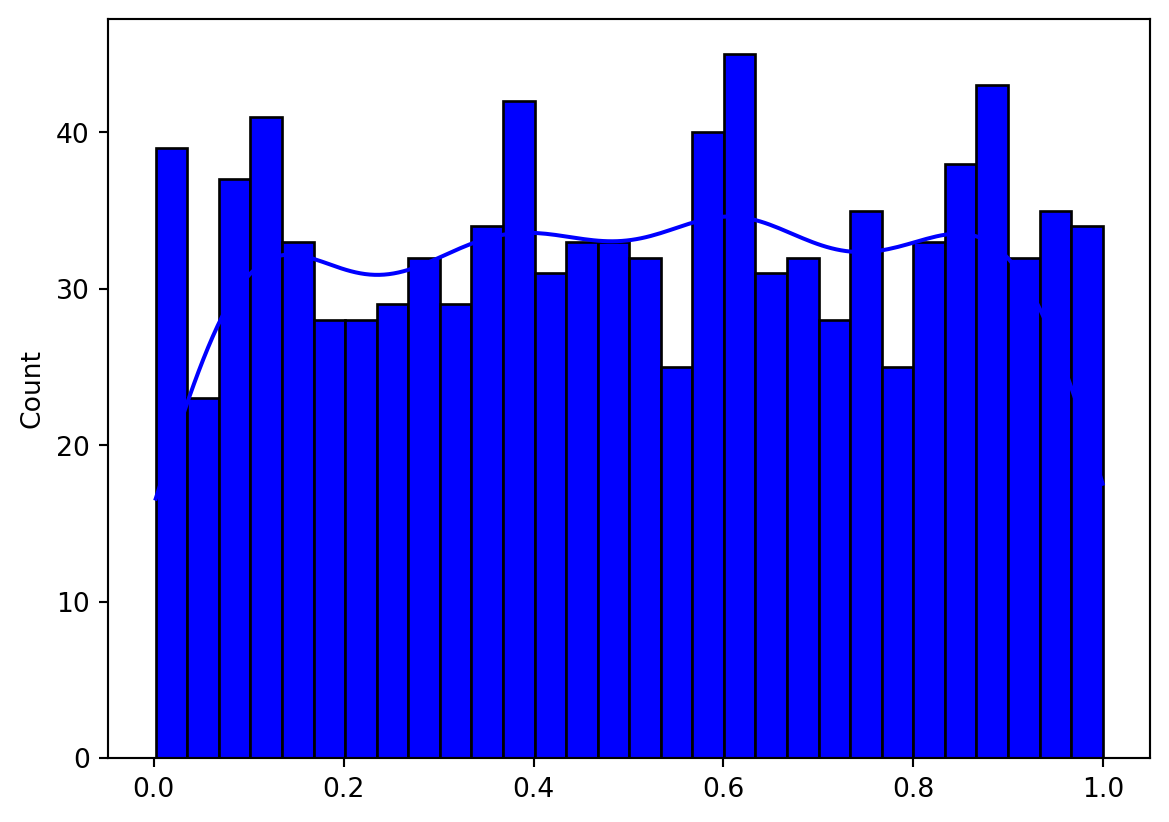

In [15]:
sns.histplot(p_value,alpha = 1, bins = 30,kde=True,
            label = r"p-value",color='blue')

In [16]:
ks_p_val

0.7919638330879013

The simulated A/A test is from the same distribution (uniform distribution) 

# 4. Analyzing Data 

Let's Recap our Experimentation Plan 


**Metrics of Experimentation** : Revenue per User 

**Experiment Unit** : User in Checkout Process 

**Variant** : 

    1. Control Group : No Product Recommendation during checkout process 
    2. Treatment Group : Product Recommendation during checkout process y 

**Number of Samples** : 1570 from each variant 


**Experiment Duration** : Experiment was conducted for a week , starting from **February 2nd, 2024** to **February 8th, 2024**


**Our Hypothesis** : by adding product recommendation could boost revenue per user

So what do we do when it comes after experiment. We obtain data from experiment log from both of each group. However as Data Scientist we should be sceptical hence we need to perform **Sanity Check** 

## 4.1. Data Check 

In [17]:
experiment_data = pd.read_csv('experiment_collected_data.csv',parse_dates=['datetime'])
experiment_data

,datetime,user_id,group,revenue_per_user
0,2024-02-02,d5683160-da8e-4027-80eb-f1543a6203e5,control,16.433941
1,2024-02-03,c829d253-d79e-42b8-9fe0-f2f69bd9d7d0,treatment,2.274594
2,2024-02-03,4307a4d6-1125-4191-8aa2-a473c5f46c5c,control,6.293043
3,2024-02-07,f23f605a-7a25-45bc-b4bf-3c9ddb4dfacb,control,29.030031
4,2024-02-06,fb404923-91df-4c01-956c-3ede39361914,control,2.196385
...,...,...,...,...
3135,2024-02-04,e56ea29f-a89f-46d0-a81d-1ad6759f26f3,treatment,13.885899
3136,2024-02-04,2597b6c8-71e2-4acc-87a0-8d775e7bf83f,treatment,6.362146
3137,2024-02-02,5e758638-e6e2-49c8-81ab-187156b59f97,control,3.460954
3138,2024-02-03,310130df-086e-4c5e-911c-1401979195a5,control,1.898356


Check number of unique user from each group

In [18]:
experiment_data.groupby('group')['user_id'].nunique()

group
control      1570
treatment    1570
Name: user_id, dtype: int64

Number of Unique User is like what we expect

Next, we should check the experiment datetime 


In [19]:
filter_1 = experiment_data['datetime'] <= '2024-08-02'
filter_2 = experiment_data['datetime'] >= '2024-02-02'

experiment_data.loc[~(filter_1&filter_2)]

,datetime,user_id,group,revenue_per_user


Our data is valid in terms of datetime as experiment plan

Next, we should check if there is duplicate record from user assignment 

In [20]:
experiment_data.duplicated(subset=['user_id','group']).sum()

0

It's safe from duplicate user assignment

### 4.1.1. Checking Guadrail Metrics


In real experiment platform, we should check , what we called as **Guadrail Metrics**, which should not be different. Otherwise it will affect the experiment outcome become bias, for example **latency**

## 4.2. Aggregating Data 

Next step after we have clean & valid data, we should aggregate data to reflect metrics from both group 


In [21]:
summarize_data = experiment_data.groupby('group').agg({'revenue_per_user':np.mean})
summarize_data

C:\Users\fakhr\AppData\Local\Temp\ipykernel_21012\1678331338.py:1: FutureWarning:

The provided callable <function mean at 0x000001AD8D28E480> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,revenue_per_user
group,
control,8.949105
treatment,9.852804


In [22]:
summarize_data['lift'] = summarize_data['revenue_per_user'].diff(1)
summarize_data

,revenue_per_user,lift
group,,
control,8.949105,NaN
treatment,9.852804,0.903699


## 4.3. Performing Statistical Test 

Condition : 
We are interested whether by providing product recommendation during checkout will increase revenue per user. 

Why we need to perform statistical test ? We can just compare the difference between mean
Yes! at some point it is right, however we only have small sample, and trying to estimate the population, hence what we can use to leverage the statistical test to add confidence in our result 

Type of Statistical Test, we want to compare the revenue, in terms of mean difference between two groups (independent sample), we can leverage **T-student Test** for mean from two sample. 
Since we are going to check its bigger or not, its one tailed test


Hypothesis : 

$H_0 : \mu_{\text{treatment}} <= \mu_{\text{control}}$

$H_1 : \mu_{\text{treatment}} > \mu_{\text{control}}$


At experiment plan we want Confidence Interval of **95%** or $\alpha=0.05$


Assumption : we don;t know variance about population, and both variance assumed to be equal 


How to conclude ? 
1. If p-value > $\alpha$ fail to reject the null Hypothesis, otherwise reject the null hypothesis
2. equivalent to if t-test value < t-table fail to reject the null Hypothesis 

In [23]:
control_group = experiment_data.loc[experiment_data['group']=='control','revenue_per_user'].values
treatment_group = experiment_data.loc[experiment_data['group']=='treatment','revenue_per_user'].values

In [24]:
t_stat,p_val_t_test = stats.ttest_ind(treatment_group,control_group, equal_var=True, random_state=45, alternative='greater')

In [25]:
p_val_t_test

1.5326415297769846e-05

Proven that we can reject null hypothesis

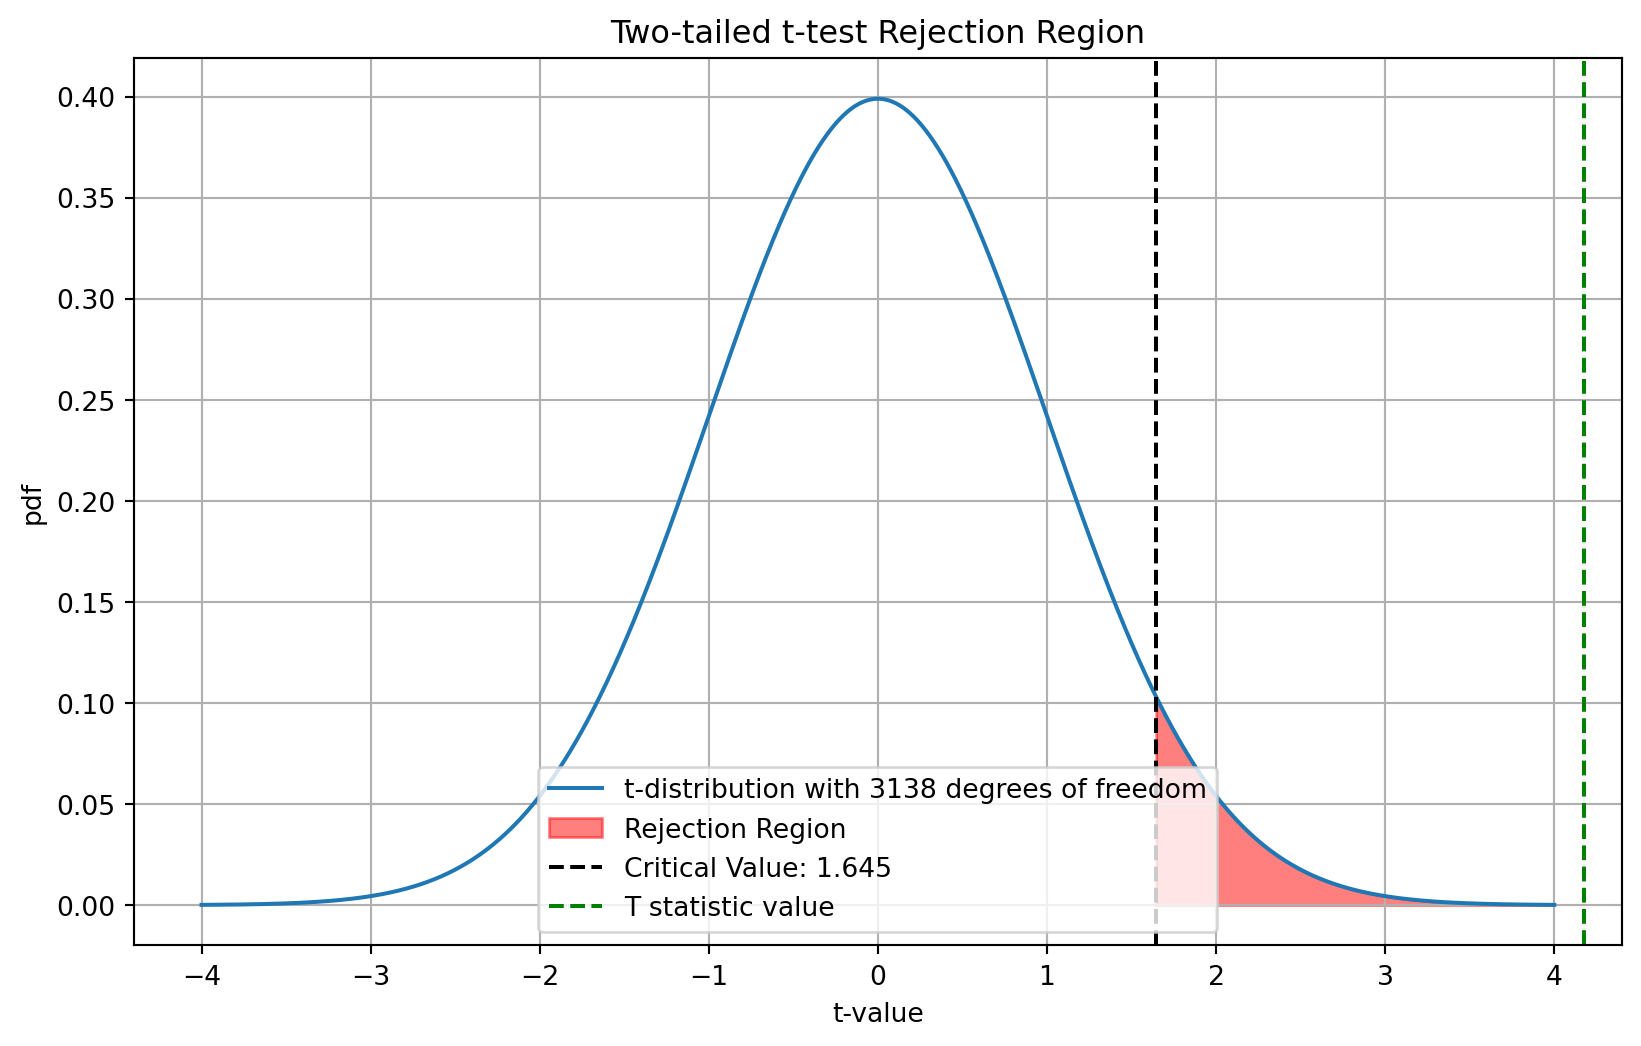

In [26]:


# Parameters
n_samples = 2*1570
alpha = 0.05
df = n_samples-2
critical_value = stats.t.ppf(1 - alpha, df)  # one tailed 

# t-distribution
x = np.linspace(-4, 4, 1000) # generate some data 
y = stats.t.pdf(x, df)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-distribution with {df} degrees of freedom')
plt.fill_between(x, y, where= (x > critical_value), color='red', alpha=0.5, label='Rejection Region')

# Add critical values
plt.axvline(critical_value, color='black', linestyle='--', label=f'Critical Value: {critical_value:.3f}')
plt.axvline(t_stat, color='green', linestyle='--', label=f'T statistic value')

# Labels and title
plt.title('Two-tailed t-test Rejection Region')
plt.xlabel('t-value')
plt.ylabel('pdf')
plt.legend()
plt.grid(True)
plt.show()


Clearly we   reject the null hypothesis. Next Step we can generate confidence interval for our treatment effect using standard error 


$$ (\bar{x}_{\text{treatment}} - \bar{x}_{\text{control}} )  -  t_{\alpha/2,df} \cdot SE \leq \mu_{\text{treatment}}- \mu_{\text{treatment}} \leq (\bar{x}_{\text{treatment}} - \bar{x}_{\text{control}} )  +  t_{\alpha/2,df} \cdot SE$$


$$SE = \sqrt{(\cfrac{s_1^2}{n_1} + \cfrac{s_2^2}{n_2}})  $$


with : 

1. $SE$ : Standard error
2. $s_1^2$ : variance from group 1 , control group
4. $s_2^2$ : variance from group 2 , treatment group
3. $n_1$ : number of sample from group 1 , control group
4. $n_2$ : number of sample from group 2 , treatment group
5. $t_{\alpha/2 , df}$ : t table value given alpha and degrees of freedom


In [27]:
difference = treatment_group.mean() - control_group.mean() 
n_1 = 1570 
n_2 = 1570
s_1 = control_group.var()
s_2 = treatment_group.var()

se = np.sqrt((s_1/n_1) + (s_2/n_2))

t_alpha = stats.t.ppf(alpha/2, df=n_1+n_2-2)


c_i = t_alpha*se



print(f'Effect Confidence Interval {difference} +/-{c_i}')




Effect Confidence Interval 0.903699066036344 +/--0.4243055658869349


In [28]:
c_i

-0.4243055658869349

In [29]:
difference

0.903699066036344

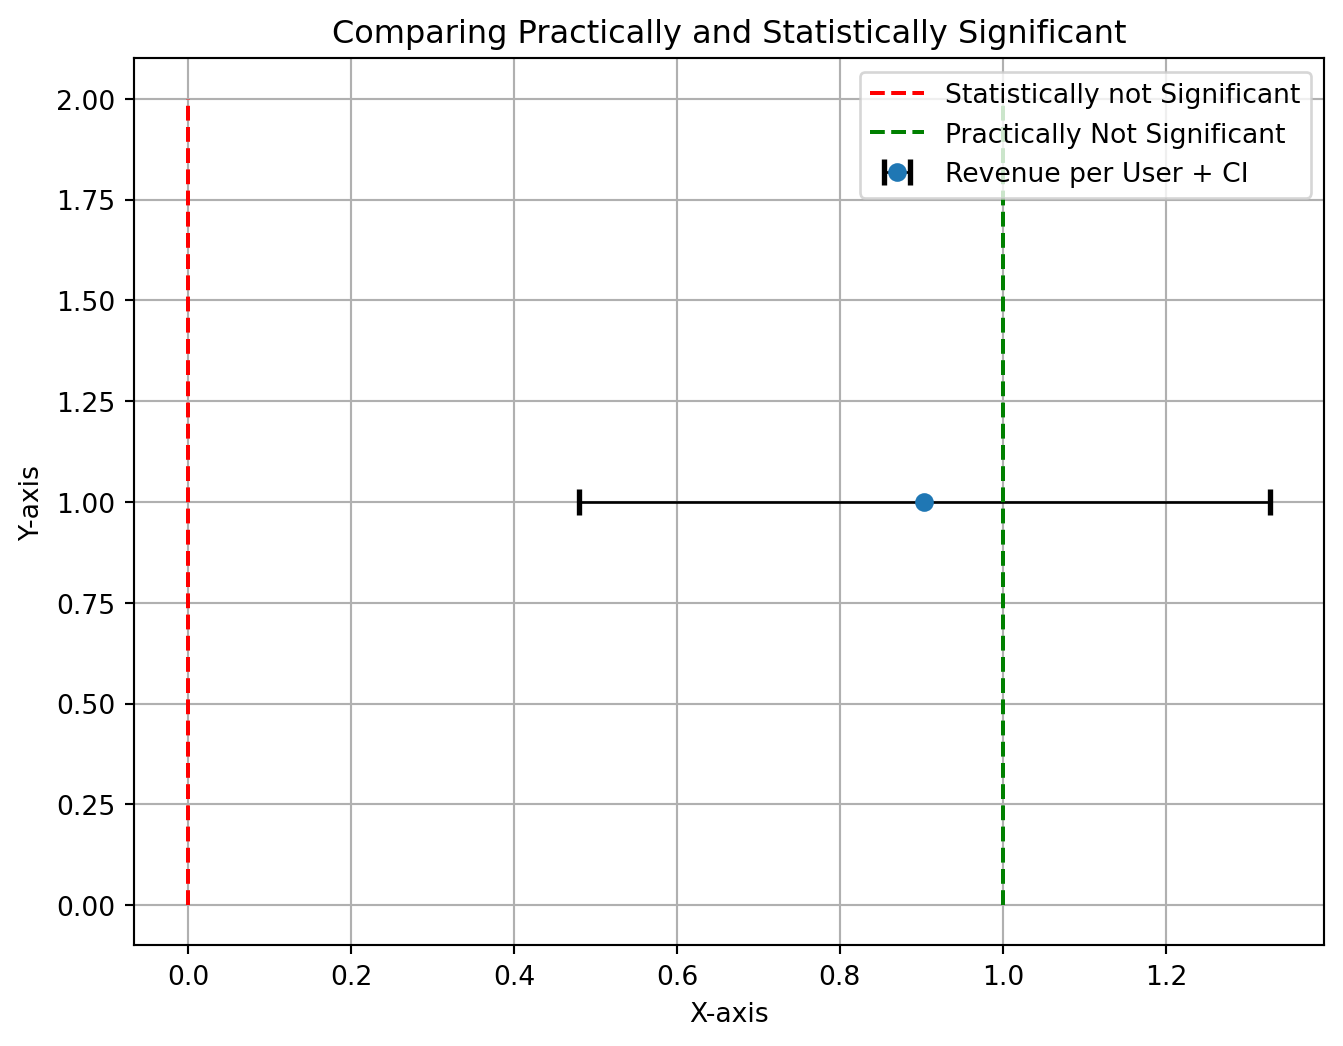

In [30]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=(8, 6))
plt.errorbar(y=1, x=difference, xerr=-c_i, fmt='o', ecolor='black', capsize=5, capthick=2, elinewidth=1, label='Revenue per User + CI')
plt.vlines(x = 0, color = 'red',ymin = 0, ymax = 2, label = 'Statistically not Significant',linestyle='--')
plt.vlines(x = 1, color = 'green',ymin = 0, ymax = 2, label = 'Practically Not Significant',linestyle='--')

plt.title('Comparing Practically and Statistically Significant')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


# 5. Inferring Decision


We already reach the end of the experimentation. We have to decided whether to launch product recommendation system during checkout process or not to all users. 

To rollout this feature , the result should be : 
1. Statistically Significant
2. Practically Significant

From the Result it looks like **only Statistical Significance** . However the revenue per user still not fullfill our minimum USD 1 Revenue per user increase, so we have to **decide not to launch the product**.